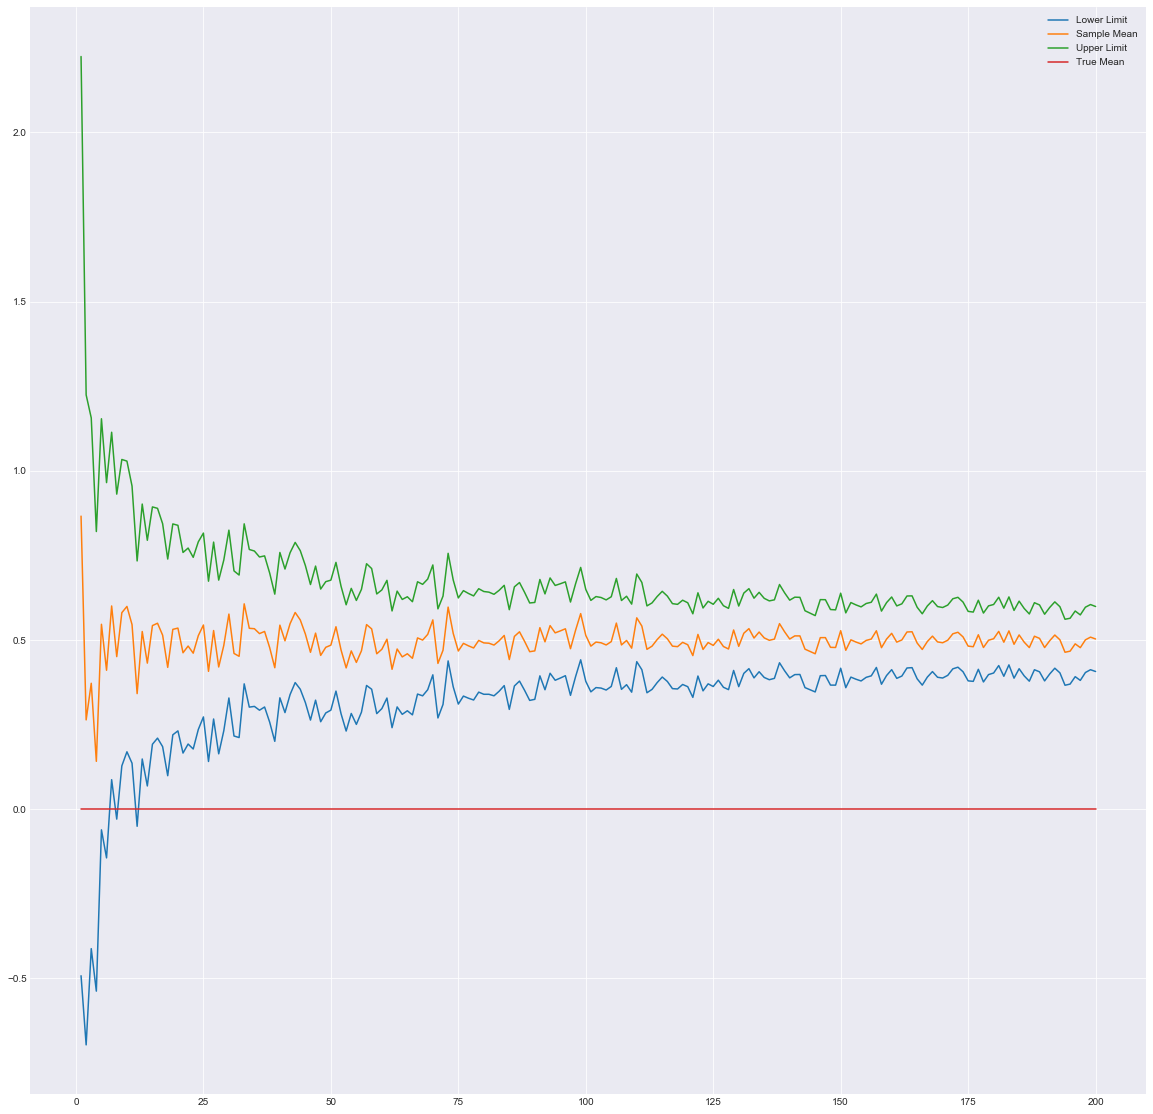

In [1]:
# Python Notebook to implement the Chernoff Hoeffding Bound for a single experiment per sample size.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

true_mean = 0.5
true_stdev = 1
l_lim = []
u_lim = []
sample_mean = []
max_samples = 200

for N in range(1,max_samples+1):
#     samples = np.random.normal(true_mean,true_stdev,N)
    samples = np.random.uniform(true_mean,true_stdev,N)
    mean = np.mean(samples)
    # confidence param in range of [0,1]
    alpha = .95
    # Bounding parameter eppsilon. Formula is taken form the tech report.
    intermediate = - math.log((1-alpha)/2.0) /( 2.0 * N)
    e = math.sqrt(intermediate)
    l_lim.append(mean-e)
    u_lim.append(mean+e)
    sample_mean.append(mean)


sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
plt.plot(np.arange(1,max_samples+1),l_lim, label = "Lower Limit")
plt.plot(np.arange(1,max_samples+1),sample_mean, label = "Sample Mean")
plt.plot(np.arange(1,max_samples+1),u_lim, label = "Upper Limit")
plt.plot(np.arange(1,max_samples+1),[true_mean]*max_samples, label = "True Mean")
plt.legend(loc = 'best')


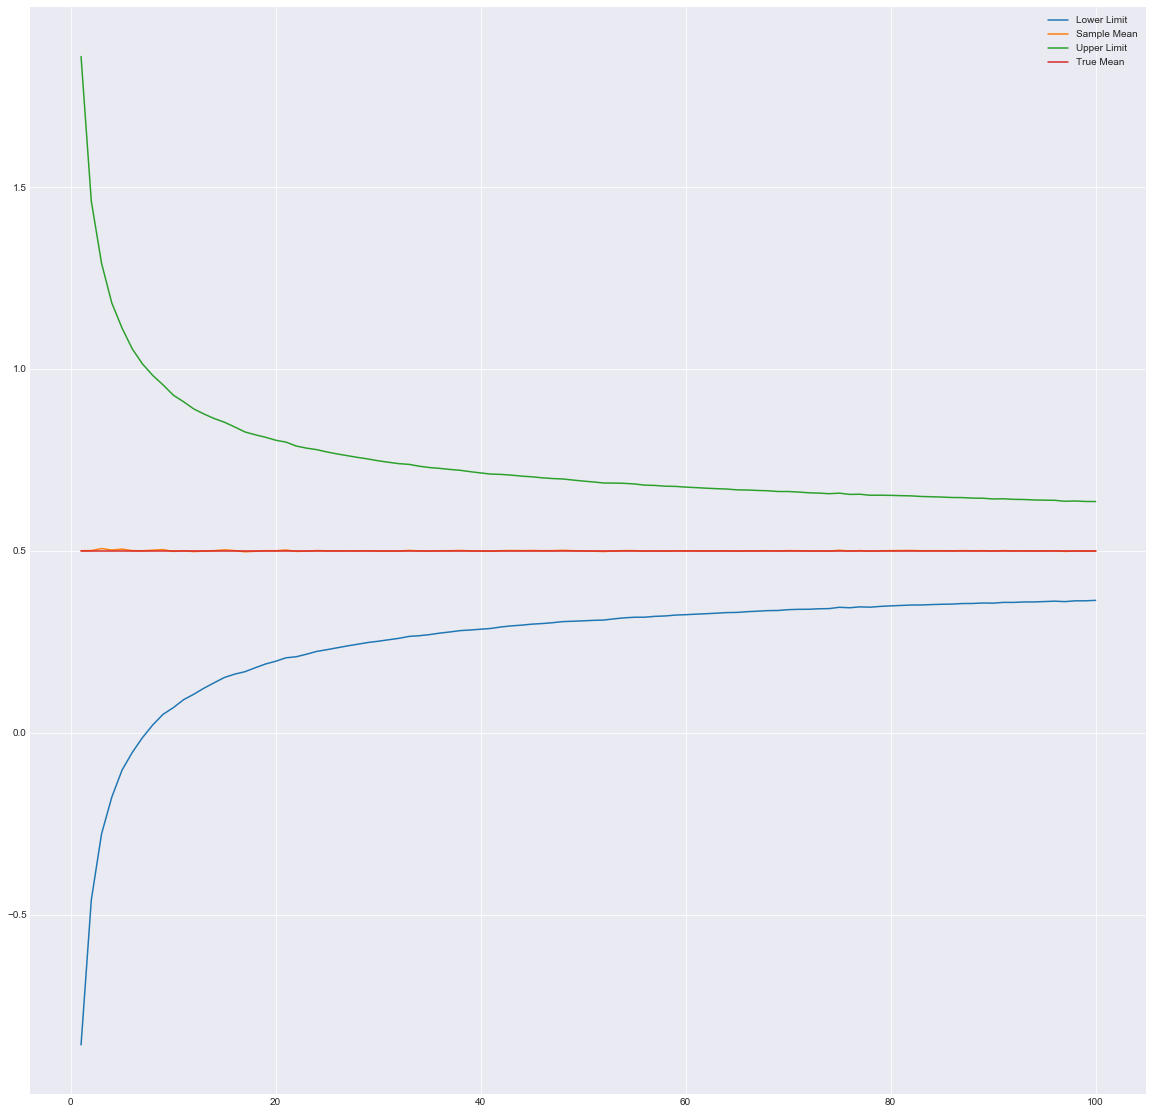

In [39]:
# Python Notebook to implement the Chernoff Hoeffding Bound for multiple experiments per sample size.
# Also counting the number of violation for each sample for multiple experiments.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
%matplotlib inline

true_mean = 0.5
true_stdev = 0.2
l_lim = []
u_lim = []
sample_mean = []
max_samples = 100
max_experiments = 1000
violation_ratio = []
# confidence param in range of [0,1]
alpha = .95
epsilons = []
lower, upper = 0, 1

for N in range(1,max_samples+1):
    intermediate_l_lim = []
    intermediate_u_lim = []
    intermediate_sample_mean = []
    violations = []
    counter = 0
    intermediate = - math.log((1-alpha)/2.0) /( 2.0 * N)
    e = math.sqrt(intermediate)
    
    for i in range(max_experiments):
        # Truncnorm gives us a truncated normal with support [0,1]
        RV = stats.truncnorm((lower - true_mean) / true_stdev, (upper - true_mean) / true_stdev, loc=true_mean, scale=true_stdev)
        samples = RV.rvs(N)
        mean = np.mean(samples)
        
        # Bounding parameter eppsilon. Formula is taken form the tech report.
        intermediate_l_lim.append(mean-e)
        intermediate_u_lim.append(mean+e)
        intermediate_sample_mean.append(mean)
        
        #Updating Counter if there is a violation
        if (abs(mean - true_mean) > e):
            counter += 1
    
    l_lim.append(np.array(intermediate_l_lim).mean())
    u_lim.append(np.array(intermediate_u_lim).mean())
    sample_mean.append(np.array(intermediate_sample_mean).mean())
    violation_ratio.append(counter / float(max_experiments))
    
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
plt.plot(np.arange(1,max_samples+1),l_lim, label = "Lower Limit")
plt.plot(np.arange(1,max_samples+1),sample_mean, label = "Sample Mean")
plt.plot(np.arange(1,max_samples+1),u_lim, label = "Upper Limit")
plt.plot(np.arange(1,max_samples+1),[true_mean]*max_samples, label = "True Mean")
plt.legend(loc = 'best')

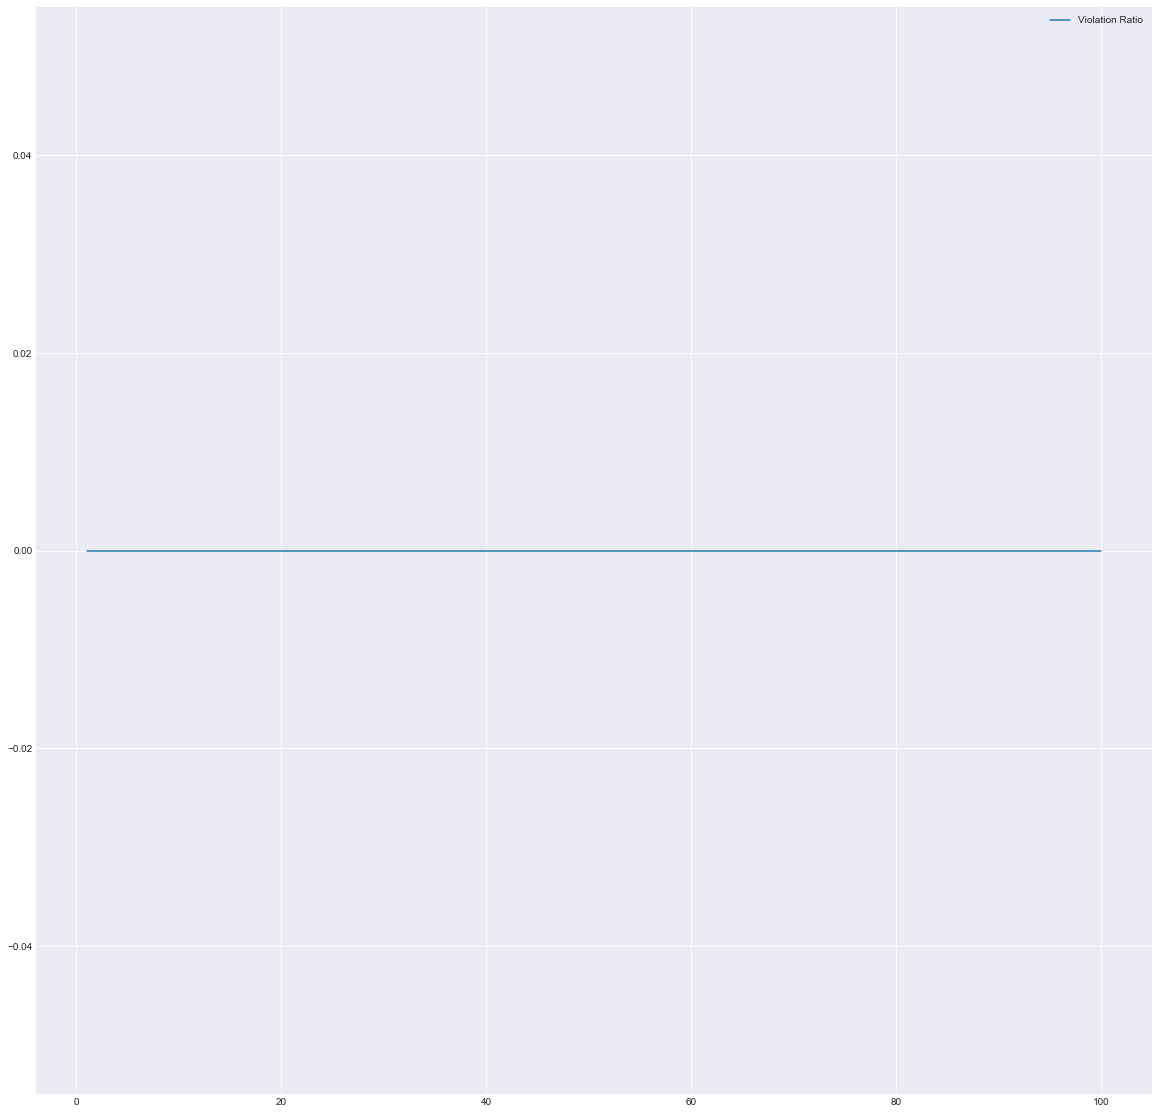

In [40]:
# PLotting the Violations for the confidence interval.
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
plt.plot(np.arange(1,max_samples+1),violation_ratio, label = "Violation Ratio")
plt.legend(loc = 'best')

# Observation - on plotting the distribution of the violation ratio, we get unexpected results. Even though Chernoff-Hoeffding 
# Guarentees us that for 0 < epsilon < 1-mu, we will get 1-alpha violations of the bound on the true mean. But on plotting the
# Violation Ratios for various experimens, we are getting more number of violations for various sample sizes.

In [38]:
# # Saving Data to file.
# file_name = "ChernovBoundsData_1000000Experiments.npz"
# np.savez(file_name, violation_ratio = violation_ratio,l_lim = l_lim, sample_mean = sample_mean, u_lim = u_lim)

# Python Notebook to implement the Chernoff Hoeffding Bound for multiple experiments per sample size.
# Also counting the number of violation for each sample for multiple experiments.
# Ploting TsPlot for the chernoff hoefding.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
%matplotlib inline

true_mean = 0.5
true_stdev = 0.2
l_lim = []
u_lim = []
sample_mean = []
max_samples = 100
max_experiments = 1000
violation_ratio = []
# confidence param in range of [0,1]
alpha = .95
epsilons = []
lower, upper = 0, 1

for N in range(1,max_samples+1):
    intermediate_l_lim = []
    intermediate_u_lim = []
    intermediate_sample_mean = []
    violations = []
    counter = 0
    intermediate = - math.log((1-alpha)/2.0) /( 2.0 * N)
    e = math.sqrt(intermediate)
    
    for i in range(max_experiments):
        # Truncnorm gives us a truncated normal with support [0,1]
        RV = stats.truncnorm((lower - true_mean) / true_stdev, (upper - true_mean) / true_stdev, loc=true_mean, scale=true_stdev)
        samples = RV.rvs(N)
        mean = np.mean(samples)
        
        # Bounding parameter eppsilon. Formula is taken form the tech report.
        intermediate_l_lim.append(mean-e)
        intermediate_u_lim.append(mean+e)
        intermediate_sample_mean.append(mean)
        
        #Updating Counter if there is a violation
        if (abs(mean - true_mean) > e):
            counter += 1
    
    l_lim.append(np.array(intermediate_l_lim).mean())
    u_lim.append(np.array(intermediate_u_lim).mean())
    sample_mean.append(np.array(intermediate_sample_mean).mean())
    violation_ratio.append(counter / float(max_experiments))
    
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
plt.plot(np.arange(1,max_samples+1),l_lim, label = "Lower Limit")
plt.plot(np.arange(1,max_samples+1),sample_mean, label = "Sample Mean")
plt.plot(np.arange(1,max_samples+1),u_lim, label = "Upper Limit")
plt.plot(np.arange(1,max_samples+1),[true_mean]*max_samples, label = "True Mean")
plt.legend(loc = 'best')